In [1]:
import CrossTabulation as ct
import ClippingRrasterWithShp as cRs
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import geopandas as gpd 


lucc1996 = r"C:\Users\jyang71\Desktop\Datasets\DLTB\DLTB1996_WH_Erase_Merge_UGB_Dis.tif"
lucc2002 = r"C:\Users\jyang71\Desktop\Datasets\DLTB\DLTB2002_WH_Erase_Merge_UGB_Dis.tif"
lucc2005 = r"C:\Users\jyang71\Desktop\Datasets\DLTB\DLTB2005_WH_Erase_Merge_UGB_Dis.tif"
lucc2010 = r"C:\Users\jyang71\Desktop\Datasets\DLTB\DLTB2010_WH_Erase_Merge_UGB_Dis.tif"
lucc2015 = r"C:\Users\jyang71\Desktop\Datasets\DLTB\DLTB2015_WH_Erase_Merge_UGB_Dis.tif"
clipFc = r"C:\Users\jyang71\Desktop\Datasets\WH_XZQ_Project_Eliminate.shp"
gpdFc1996 = cRs.getLuccArr(lucc1996,clipFc)
gpdFc2002 = cRs.getLuccArr(lucc2002,clipFc)
gpdFc2005 = cRs.getLuccArr(lucc2005,clipFc)
gpdFc2010 = cRs.getLuccArr(lucc2010,clipFc)
gpdFc2015 = cRs.getLuccArr(lucc2015,clipFc)

gpdFc = gpd.read_file(clipFc)

ptnLst = []
shapeLength = gpdFc1996.shape[0]

for i in range(shapeLength):
	mapArr_96 = gpdFc1996.LuccMtx[i][0]
	mapArr_05 = gpdFc2005.LuccMtx[i][0]
	mapArr_10 = gpdFc2010.LuccMtx[i][0]
	mapArr_15 = gpdFc2015.LuccMtx[i][0]
	TM_9605 = ct.transMatrix(mapArr_96,mapArr_05,7)[1]
	gainIntenPtn_9605,lossIntenPtn_9605 = ct.TransPattern(TM_9605,9)
	GainLossPtn_9605 = ct.mergeGainLoss(gainIntenPtn_9605,lossIntenPtn_9605)

	TM_0510 = ct.transMatrix(mapArr_05,mapArr_10,7)[1]
	gainIntenPtn_0510,lossIntenPtn_0510 = ct.TransPattern(TM_0510,5)
	GainLossPtn_0510 = ct.mergeGainLoss(gainIntenPtn_0510,lossIntenPtn_0510)

	TM_1015 = ct.transMatrix(mapArr_10,mapArr_15,7)[1]
	gainIntenPtn_1015,lossIntenPtn_1015 = ct.TransPattern(TM_1015,5)
	GainLossPtn_1015 = ct.mergeGainLoss(gainIntenPtn_1015,lossIntenPtn_1015)

	Ptn = ct.mergeInterval(GainLossPtn_9605,GainLossPtn_0510,GainLossPtn_1015)
	ptnLst.append(list(np.array(Ptn)))

gpdFc['TransPtn'] = ptnLst
#get the transition pattern array with syntax: 		np.array(gpdFc.TransPtn[0])


C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\LCM_Pattern\CrossTabulation.py:56: RuntimeWarning: invalid value encountered in double_scalars
  gainIntensity_ji = (arr[j][i]/duration)/np.sum(arr[j,:])
C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\LCM_Pattern\CrossTabulation.py:59: RuntimeWarning: invalid value encountered in greater_equal
  gainIntenMatr[gainIntenMatr >= average_gain] = 1		# tend to
C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\LCM_Pattern\CrossTabulation.py:60: RuntimeWarning: invalid value encountered in less
  gainIntenMatr[gainIntenMatr < average_gain] = 2			# avoid
C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\LCM_Pattern\CrossTabulation.py:77: RuntimeWarning: invalid value encountered in double_scalars
  lossIntensity_ij = (arr[i][j]/duration)/np.sum(arr[:,j])
C:\Users\jyang71\Desktop\LCM_Pattern_Cluster\LCM_Pattern\CrossTabulation.py:80: RuntimeWarning: invalid value encountered in greater_equal
  lossIntenMatr[lossIntenMatr >= np.array(average_loss).T] = 1    # tend

In [3]:
for i in range(110):
    a = np.array(gpdFc.TransPtn[i])
    b = np.ravel(a)
    c = b[b > 0]
    print(c.shape)

(252,)
(252,)
(252,)
(252,)
(252,)
(240,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(240,)
(252,)
(252,)
(246,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)
(252,)


In [3]:
np.array(gpdFc.TransPtn[i]).shape

(21, 14)

In [4]:
for i in range(110):
    for j in range(110):
        kappa = ct.kappa(np.array(gpdFc.TransPtn[i]),np.array(gpdFc.TransPtn[j]))
        print(kappa)

1.0
0.28799638989169674
0.2870097005482919
0.5353054705177692
0.6134030418250951
0.35125376128385155
0.3269474064702693
0.5116430700447094
0.27004333694474536
0.5504448288644508
0.5451334625242232
0.4051911309954602
0.25659241420830825
0.4918721973094171
0.482326855354115
0.7042536884460624
0.2518070112034695
0.6244491281854762
0.26070589652472453
0.3705357142857143
0.4485239852398524
0.4271638575592447
0.20310805926996744
0.23939594488899585
0.24742516412696514
0.2212858174813388
0.21163000903886708
0.2518070112034695
0.2695597181232309
0.46762211353928074
0.24295265630646912
0.2521673690547863
0.269691677706853
0.3623670212765957
0.2569950057163487
0.22152012998736237
0.3255241567912489
0.2701751218631522
0.25225740428605825
0.28396175356305253
0.2571737953438007
0.20382740566889335
0.2524374097255657
0.22184793070259867
0.2304591130633611
0.2657519407835349
0.19517477889417
0.3212224314964457
0.26128430428502647
0.2357095630221795
0.22631578947368425
0.2925464717560007
0.26230542700

In [6]:
test1 = np.array(gpdFc.TransPtn[i])

In [7]:
test1

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
       [0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1],
       [0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2],
       [2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2],
       [2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1],
       [1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1],
       [1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1],
       [1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1],
       [2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2],
       [2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2],
       [1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2],
       [1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2],
       [1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2],
       [1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2],
       [2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2],
       [2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2],
       [2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1],
       [2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2],
       [1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0],
       [1, 2, 1, 2, 1, 1, 1, 1,

In [ ]:
np.ravel(test1)[np.ravel(test1)>0]

In [9]:
a1 = np.ravel(test1)

In [18]:
b1 = a1[a1!=0]

In [19]:
b1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2], dtype=int8)

In [5]:
for i in range(110):
    a = np.array(gpdFc.TransPtn[i])
    b = np.ravel(a)
    c = b[b == 0]
    print(c)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 

In [6]:
for i in range(110):
    a = np.array(gpdFc.TransPtn[i])
    print(a)

[[0 0 1 2 2 2 1 3 2 1 2 2 1 3]
 [0 0 1 2 1 3 1 3 1 3 2 2 1 3]
 [0 0 1 2 1 3 1 3 1 3 2 2 1 3]
 [1 1 0 0 2 1 1 3 2 1 2 2 1 3]
 [2 1 0 0 1 3 1 3 1 3 2 2 1 3]
 [1 2 0 0 1 3 1 3 1 3 1 1 1 3]
 [2 2 2 2 0 0 1 3 2 1 1 2 1 3]
 [2 2 1 1 0 0 1 3 1 3 1 2 1 3]
 [3 2 3 2 0 0 3 3 3 3 3 2 3 3]
 [3 2 3 2 3 2 0 0 3 1 3 2 3 3]
 [3 2 3 2 3 3 0 0 3 3 3 2 3 3]
 [3 2 3 2 3 3 0 0 3 3 3 2 3 3]
 [3 2 3 2 3 2 3 3 0 0 3 2 3 3]
 [2 2 1 2 1 3 1 3 0 0 2 2 1 3]
 [3 2 3 2 3 3 3 3 0 0 3 2 3 3]
 [2 2 2 1 1 1 1 3 1 1 0 0 1 3]
 [1 1 2 1 1 3 1 3 1 3 0 0 1 3]
 [1 2 2 2 1 3 1 3 1 3 0 0 1 3]
 [2 2 1 2 2 2 1 3 1 1 2 2 0 0]
 [3 2 3 2 3 3 3 3 3 3 3 2 0 0]
 [3 2 3 2 3 3 3 3 3 3 3 2 0 0]]
[[0 0 1 1 2 2 2 1 2 1 1 2 2 2]
 [0 0 2 2 2 1 2 1 1 1 1 2 2 1]
 [0 0 1 1 2 2 2 1 2 2 1 2 1 2]
 [2 2 0 0 2 1 2 2 2 1 2 2 2 1]
 [2 1 0 0 1 1 2 1 2 1 2 1 1 1]
 [1 2 0 0 2 2 2 1 2 2 1 2 1 2]
 [2 2 1 1 0 0 1 1 2 2 1 2 2 2]
 [1 2 1 2 0 0 2 2 2 2 2 2 2 2]
 [1 2 1 1 0 0 2 1 2 2 1 2 1 2]
 [2 2 2 2 2 2 0 0 1 1 1 2 2 2]
 [1 2 1 2 1 1 0 0 2 2 2 2 2 2]
 [1 2 2

In [27]:
for i in range(5,6):
    print(i)

5


In [32]:
Ptn

cls_1      cls_2      cls_3      cls_4      cls_5      cls_6  \
                  Gain Loss  Gain Loss  Gain Loss  Gain Loss  Gain Loss  Gain   
cls_1 interval_1     0    0     3    1     3    3     3    3     3    2     3   
      interval_2     0    0     3    0     3    3     3    3     3    3     3   
      interval_3     0    0     3    0     3    3     3    3     3    3     3   
cls_2 interval_1     1    3     0    0     1    3     1    3     1    2     1   
      interval_2     1    3     0    0     1    3     1    3     1    3     1   
      interval_3     1    3     0    0     1    3     1    3     1    3     1   
cls_3 interval_1     3    3     3    1     0    0     3    3     3    2     3   
      interval_2     3    3     3    0     0    0     3    3     3    3     3   
      interval_3     3    3     3    0     0    0     3    3     3    3     3   
cls_4 interval_1     3    3     3    1     3    3     0    0     3    2     3   
      interval_2     3    3     3    0     3    3     0    0     3    3     3   
      interval_3     3    3     3    0     3    3     0    0     3    3     3   
cls_5 interval_1     1    3     1    1     1    3     1    3     0    0     1   
      interval_2     1    3     1    0     1    3     1    3     0    0     1   
      interval_3     3    3     3    0     3    3     3    3     0    0     3   
cls_6 interval_1     3    3     3    1     3    3     3    3     3    2     0   
      interval_2     3    3     3    0     3    3     3    3     3    3     0   
      interval_3     3    3     3    0     3    3     3    3     3    3     0   
cls_7 interval_1     3    3     3    1     3    3     3    3     3    2     3   
      interval_2     3    3     3    0     3    3     3    3     3    3     3   
      interval_3     3    3     3    0     3    3     3    3     3    3     3   

                      cls_7       
                 Loss  Gain Loss  
cls_1 interval_1    3     3    3  
      interval_2    3     3    3  
      interval_3    3     3    3  
cls_2 interval_1    3     1    3  
      interval_2    3     1    3  
      interval_3    3     1    3  
cls_3 interval_1    3     3    3  
      interval_2    3     3    3  
      interval_3    3     3    3  
cls_4 interval_1    3     3    3  
      interval_2    3     3    3  
      interval_3    3     3    3  
cls_5 interval_1    3     1    3  
      interval_2    3     1    3  
      interval_3    3     3    3  
cls_6 interval_1    0     3    3  
      interval_2    0     3    3  
      interval_3    0     3    3  
cls_7 interval_1    3     0    0  
      interval_2    3     0    0  
      interval_3    3     0    0

In [30]:
GainLossPtn_0510

cls_1      cls_2      cls_3      cls_4      cls_5      cls_6      cls_7  \
       Gain Loss  Gain Loss  Gain Loss  Gain Loss  Gain Loss  Gain Loss  Gain   
cls_1     0    0     3    0     3    3     3    3     3    3     3    3     3   
cls_2     1    3     0    0     1    3     1    3     1    3     1    3     1   
cls_3     3    3     3    0     0    0     3    3     3    3     3    3     3   
cls_4     3    3     3    0     3    3     0    0     3    3     3    3     3   
cls_5     1    3     1    0     1    3     1    3     0    0     1    3     1   
cls_6     3    3     3    0     3    3     3    3     3    3     0    0     3   
cls_7     3    3     3    0     3    3     3    3     3    3     3    3     0   

            
      Loss  
cls_1    3  
cls_2    3  
cls_3    3  
cls_4    3  
cls_5    3  
cls_6    3  
cls_7    0

In [33]:
gainIntenPtn_0510

array([[0, 3, 3, 3, 3, 3, 3],
       [1, 0, 1, 1, 1, 1, 1],
       [3, 3, 0, 3, 3, 3, 3],
       [3, 3, 3, 0, 3, 3, 3],
       [1, 1, 1, 1, 0, 1, 1],
       [3, 3, 3, 3, 3, 0, 3],
       [3, 3, 3, 3, 3, 3, 0]], dtype=int8)

In [34]:
lossIntenPtn_0510

array([[0, 0, 3, 3, 3, 3, 3],
       [3, 0, 3, 3, 3, 3, 3],
       [3, 0, 0, 3, 3, 3, 3],
       [3, 0, 3, 0, 3, 3, 3],
       [3, 0, 3, 3, 0, 3, 3],
       [3, 0, 3, 3, 3, 0, 3],
       [3, 0, 3, 3, 3, 3, 0]], dtype=int8)

In [35]:
from rasterio.plot import show

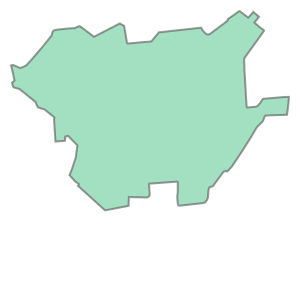

In [42]:
gpdFc.geometry[5]

In [46]:
gainIntenMatr = np.ones((5,5))*3

In [47]:
gainIntenMatr

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])